# LIBRARY

In [1]:
# Reproducibility Setup
import numpy as np
import random

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Check library versions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print("\nRandom seed set to 42 for reproducibility.")


Random seed set to 42 for reproducibility.


# IMPORT DATA

In [2]:
# Import Data
df = pd.read_csv("../data/IAT_data_imported.csv")
df.head()

,ID,Internet_usg,Internet_Add,Gender,Age_grp,Level_study,Yr_study,Discipline,stay_online,neglect_chores,...,play,interest,worthless,suicide,tiredness,uncomfortable,easily_tired,SQR_Total,New_SQR_total,SQR_catg
0,1,33,1,1,1,1,7,0,3,1,...,1,1,1,1,1,1,1,18,2,0
1,2,10,0,1,1,1,7,0,0,1,...,1,1,1,1,1,1,1,20,0,0
2,3,62,2,1,2,0,3,0,3,4,...,1,0,1,1,1,1,1,10,10,1
3,4,27,1,0,1,0,3,0,1,2,...,1,0,1,1,1,1,1,19,1,0
4,5,41,2,0,1,1,7,0,4,3,...,1,1,1,1,1,1,0,16,4,0


# STRUKTUR DATA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   984 non-null    int64 
 1   Internet_usg         984 non-null    int64 
 2   Internet_Add         984 non-null    int64 
 3   Gender               984 non-null    int64 
 4   Age_grp              984 non-null    int64 
 5   Level_study          984 non-null    int64 
 6   Yr_study             984 non-null    int64 
 7   Discipline           984 non-null    int64 
 8   stay_online          984 non-null    int64 
 9   neglect_chores       984 non-null    int64 
 10  excitement           984 non-null    int64 
 11  relationships        984 non-null    int64 
 12  life_complaint       984 non-null    int64 
 13  school_work          984 non-null    int64 
 14  email_socialmedia    984 non-null    int64 
 15  job_performance      984 non-null    int64 
 16  defensiv

# EKSPLORASI DATA

In [4]:
# cek missing values
df.isnull().sum()

ID                     0
Internet_usg           0
Internet_Add           0
Gender                 0
Age_grp                0
Level_study            0
Yr_study               0
Discipline             0
stay_online            0
neglect_chores         0
excitement             0
relationships          0
life_complaint         0
school_work            0
email_socialmedia      0
job_performance        0
defensive_secretive    0
disturbing_thoughts    0
online_anticipation    0
life_no_internet       0
act_annoyed            0
late_night_logins      0
feel_preoccupied       0
online_glued           0
time_cutdown           0
hide_online            0
more_online_time       0
feel_depressed         0
filter_$               0
headache               0
appetite               0
sleep                  0
fear                   0
shaking                0
nervous                0
digestion              0
troubled               0
unhappy                0
cry                    0
enjoyment              0


In [5]:
# cek duplikasi ID
df['ID'].duplicated().sum()

np.int64(0)

## Distribusi Data

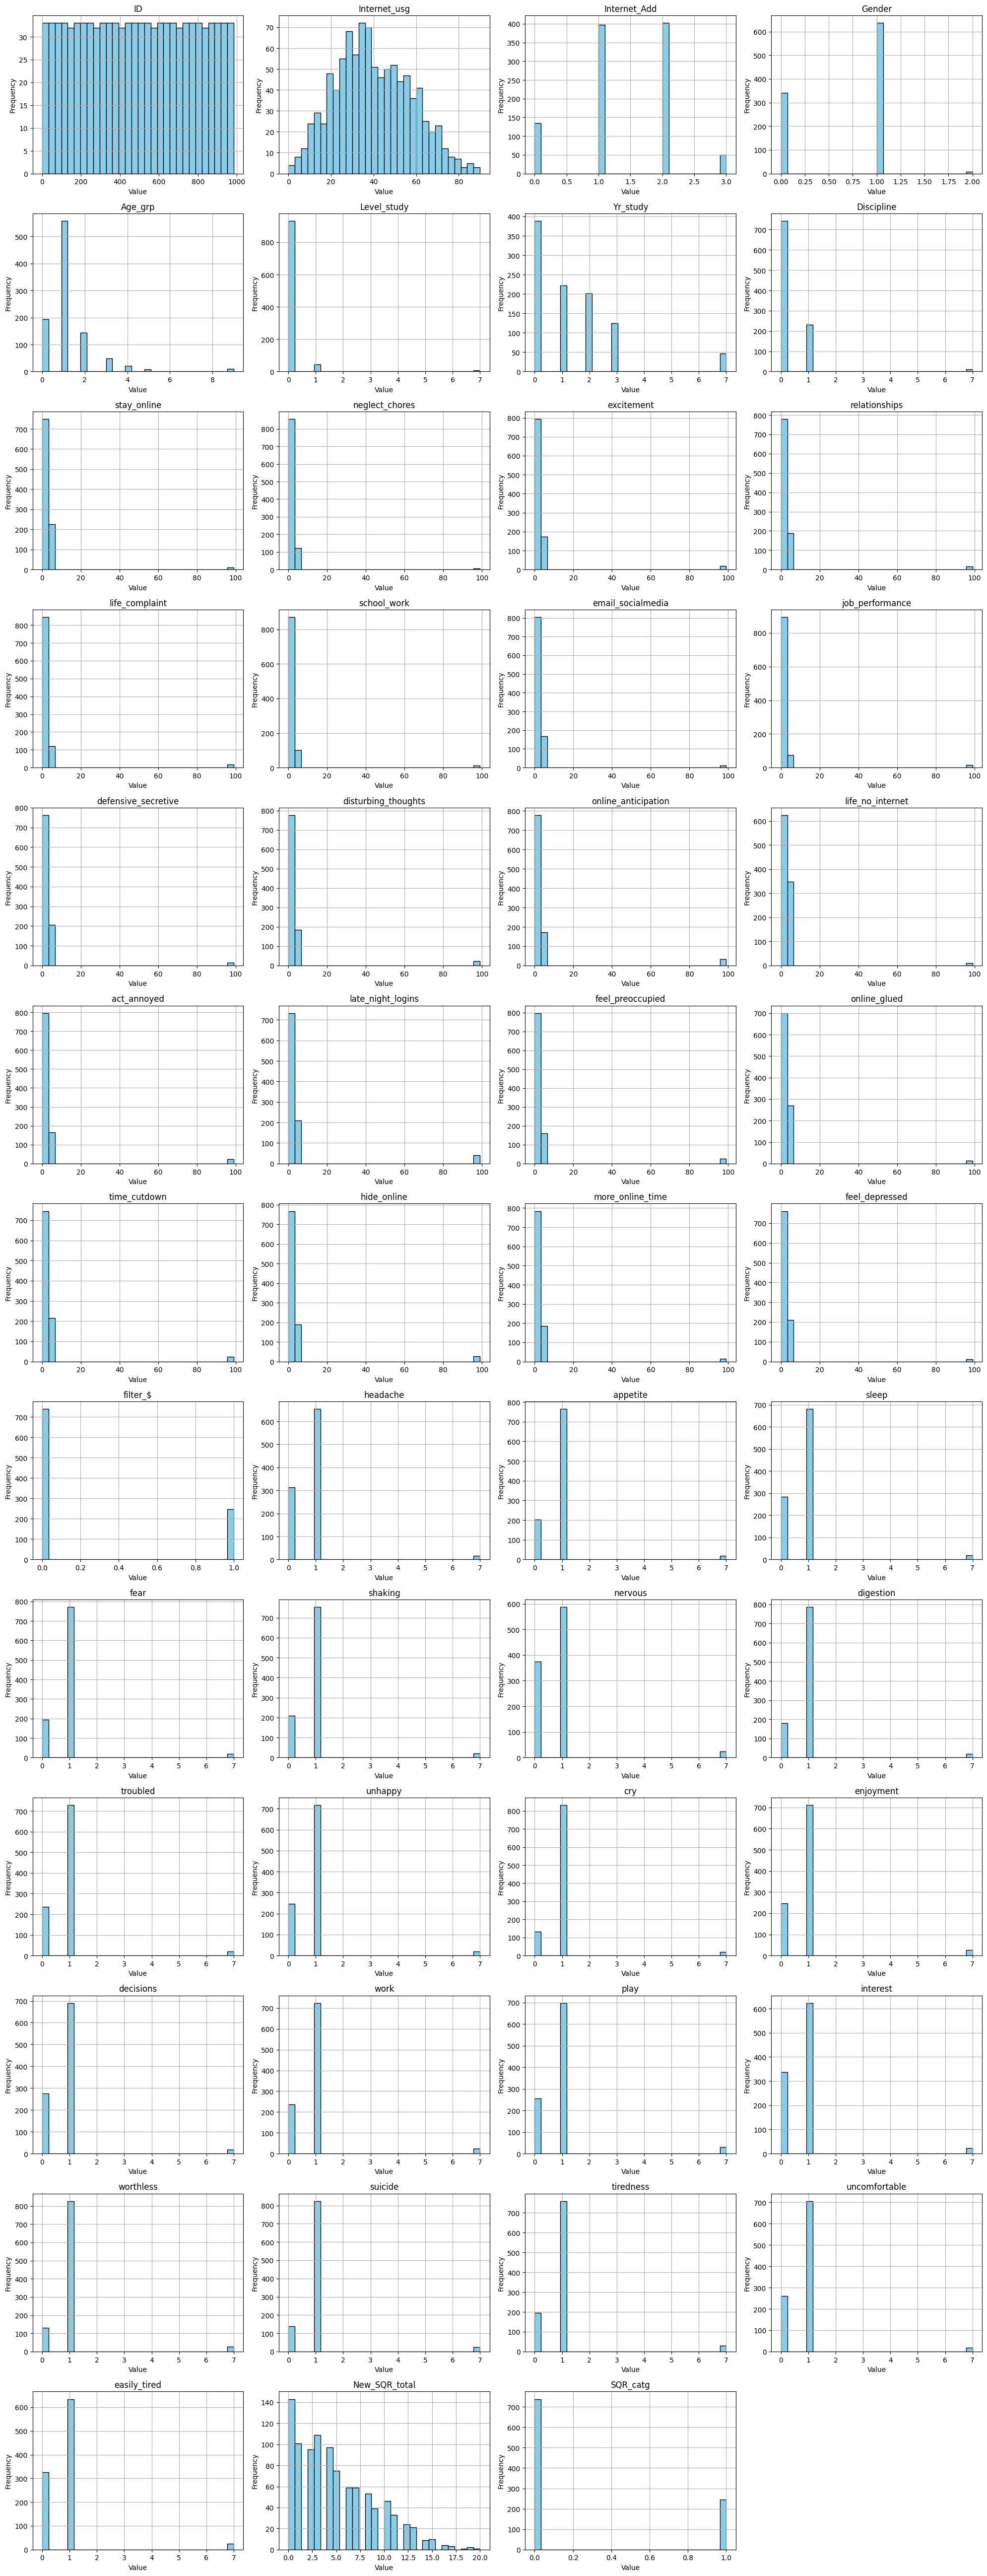

In [6]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=len(numeric_cols)//4 + 1, ncols=4, figsize=(20, 4*(len(numeric_cols)//4 + 1)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df[col].hist(ax=axes[i], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# FEATURE ENGINEERING

In [7]:
df['SQR_Total'] = pd.to_numeric(df['SQR_Total'], errors='coerce')
missing_sqr_total = df['SQR_Total'].isnull().sum()
print(f"Jumlah missing values pada SQR_Total: {missing_sqr_total}")

Jumlah missing values pada SQR_Total: 117


In [8]:
Y = 'Internet_Add'
print("Correlations with target variable", Y)
# Fill missing values for correlation calculation
df_numeric = df.select_dtypes(include=[np.number]).fillna(df.select_dtypes(include=[np.number]).mean())
print(df_numeric.corr()[Y].sort_values(ascending=False))

Correlations with target variable Internet_Add
Internet_Add           1.000000
Internet_usg           0.924877
New_SQR_total          0.376817
filter_$               0.328325
SQR_catg               0.328325
neglect_chores         0.073092
stay_online            0.070882
school_work            0.065835
email_socialmedia      0.048277
job_performance        0.041238
feel_depressed         0.028088
online_anticipation    0.026418
more_online_time       0.020498
life_no_internet       0.020185
defensive_secretive    0.020149
relationships          0.019316
life_complaint         0.013877
time_cutdown           0.010790
feel_preoccupied       0.007623
act_annoyed            0.007179
excitement             0.004486
Discipline             0.002219
ID                     0.000318
shaking               -0.000884
online_glued          -0.003411
worthless             -0.004841
hide_online           -0.011642
late_night_logins     -0.019300
suicide               -0.022829
troubled              -0.

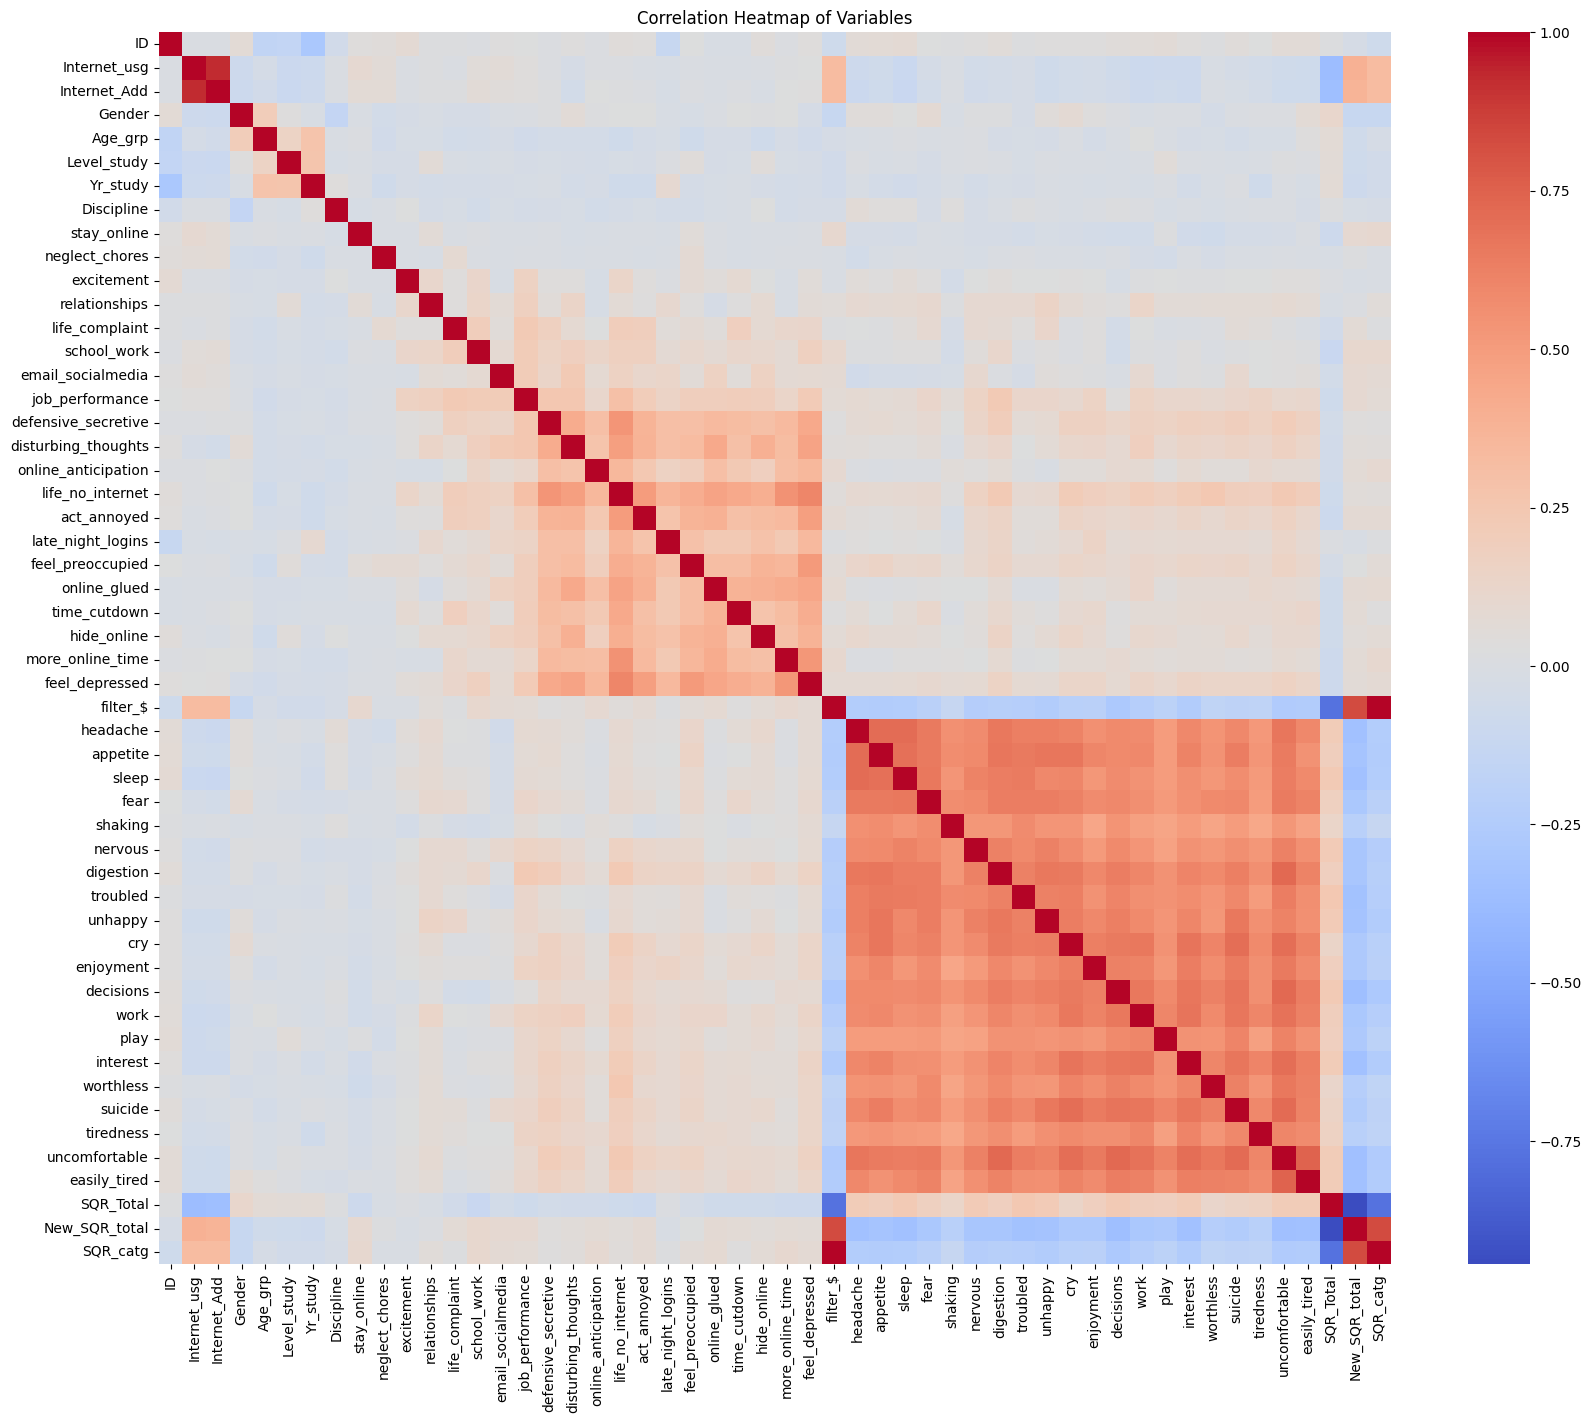

In [9]:
# Compute correlation matrix
# Fill missing values with mean for correlation calculation
df_filled = df.select_dtypes(include=[np.number]).fillna(df.select_dtypes(include=[np.number]).mean())
corr_matrix = df_filled.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap of Variables')
plt.show()

# MODELLING

## Weighted Pada Fitur Berdasar Korelasi

In [10]:
# Import libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [11]:
# Data preparation
# Note: random_state=42 ensures reproducible train-test split
X = df.drop(['ID', 'Internet_Add'], axis=1)  # Exclude ID and target
y = df['Internet_Add']

# Handle missing values (fill with mean for simplicity)
X = X.fillna(X.mean())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Custom Weighted Feature Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import numpy as np

class WeightedFeatureGaussianNB(GaussianNB):
    def __init__(self, feature_weights=None, **kwargs):
        super().__init__(**kwargs)
        self.feature_weights = tuple(feature_weights) if feature_weights is not None else None

    def fit(self, X, y, sample_weight=None):
        self.classes_ = np.unique(y)
        X, y = check_X_y(X, y)
        if sample_weight is not None:
            sample_weight = check_array(sample_weight, ensure_2d=False)
        self._partial_fit(X, y, self.classes_, _refit=True, sample_weight=sample_weight)
        return self

    def _partial_fit(self, X, y, classes=None, _refit=False, sample_weight=None):
        super()._partial_fit(X, y, classes, _refit, sample_weight)
        if self.feature_weights is None:
            self.feature_weights = tuple(np.ones(X.shape[1]))
        return self

    def predict_proba(self, X):
        # Override to apply feature weights
        check_is_fitted(self)
        X = self._check_X(X)
        probas = np.zeros((X.shape[0], len(self.classes_)))
        for i, c in enumerate(self.classes_):
            prior = self.class_prior_[i] if self.class_prior_ is not None else 1 / len(self.classes_)
            likelihood = np.ones(X.shape[0])
            for j in range(X.shape[1]):
                mean = self.theta_[i, j]
                var = self.var_[i, j]  # Use var_ instead of sigma_
                weight = self.feature_weights[j]
                # Weighted Gaussian likelihood
                diff = X[:, j] - mean
                weighted_likelihood = np.exp(-0.5 * diff**2 / var) / np.sqrt(2 * np.pi * var)
                likelihood *= weighted_likelihood ** weight  # Apply weight as exponent
            probas[:, i] = prior * likelihood
        # Normalize
        probas /= probas.sum(axis=1, keepdims=True)
        return probas

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]

    def _html_repr(self):
        return None

    def _get_params_html(self, deep=True):
        try:
            return super()._get_params_html(deep)
        except ValueError:
            # Fallback if array comparison fails
            params = self.get_params(deep=deep)
            return ParamsDict(params, non_default=())

    def _repr_mimebundle_(self, **kwargs):
        try:
            return super()._repr_mimebundle_(**kwargs)
        except ValueError:
            return {"text/plain": repr(self)}

In [13]:
# Calculate feature weights based on absolute correlation with target
correlations = X_train.corrwith(y_train).abs()
feature_weights = correlations.values
feature_weights = feature_weights / feature_weights.max()  # Normalize to max 1
print("Feature weights based on correlation:")
for col, weight in zip(X_train.columns, feature_weights):
    print(f"{col}: {weight:.3f}")

Feature weights based on correlation:
Internet_usg: 1.000
Gender: 0.080
Age_grp: 0.052
Level_study: 0.106
Yr_study: 0.121
Discipline: 0.023
stay_online: 0.106
neglect_chores: 0.056
excitement: 0.004
relationships: 0.003
life_complaint: 0.007
school_work: 0.052
email_socialmedia: 0.045
job_performance: 0.025
defensive_secretive: 0.005
disturbing_thoughts: 0.057
online_anticipation: 0.046
life_no_internet: 0.002
act_annoyed: 0.003
late_night_logins: 0.013
feel_preoccupied: 0.020
online_glued: 0.015
time_cutdown: 0.008
hide_online: 0.031
more_online_time: 0.012
feel_depressed: 0.017
filter_$: 0.364
headache: 0.095
appetite: 0.096
sleep: 0.117
fear: 0.047
shaking: 0.001
nervous: 0.064
digestion: 0.037
troubled: 0.019
unhappy: 0.084
cry: 0.046
enjoyment: 0.046
decisions: 0.056
work: 0.097
play: 0.061
interest: 0.086
worthless: 0.002
suicide: 0.031
tiredness: 0.039
uncomfortable: 0.081
easily_tired: 0.057
SQR_Total: 0.396
New_SQR_total: 0.417
SQR_catg: 0.364


In [14]:
# Display feature details: name, correlation, weight
import pandas as pd

feature_details = pd.DataFrame({
    'Feature': X_train.columns,
    'Correlation': correlations.values,
    'Weight': feature_weights
})
print("Feature Details:")
print(feature_details.sort_values(by='Correlation', ascending=False))

Feature Details:
                Feature  Correlation    Weight
0          Internet_usg     0.925917  1.000000
48        New_SQR_total     0.385880  0.416754
47            SQR_Total     0.366209  0.395510
26             filter_$     0.336596  0.363527
49             SQR_catg     0.336596  0.363527
4              Yr_study     0.111736  0.120676
29                sleep     0.107897  0.116530
3           Level_study     0.098311  0.106177
6           stay_online     0.097878  0.105709
39                 work     0.090240  0.097460
28             appetite     0.089254  0.096395
27             headache     0.087555  0.094560
41             interest     0.079748  0.086129
35              unhappy     0.077414  0.083608
45        uncomfortable     0.075356  0.081386
1                Gender     0.074422  0.080376
32              nervous     0.059509  0.064270
40                 play     0.056812  0.061358
46         easily_tired     0.053044  0.057288
15  disturbing_thoughts     0.052517  0.056

In [15]:
# Initialize Weighted Feature Gaussian NB
wf_nb_model = WeightedFeatureGaussianNB(feature_weights=feature_weights)

In [16]:
# Train the weighted feature model
wf_nb_model.fit(X_train_scaled, y_train);

In [17]:
# Make predictions with weighted feature model
probas = wf_nb_model.predict_proba(X_test_scaled)
y_pred_wf = wf_nb_model.classes_[np.argmax(probas, axis=1)]

In [18]:
# Evaluate the weighted feature model
print("Accuracy (Weighted Feature NB):", accuracy_score(y_test, y_pred_wf))
print("\nClassification Report (Weighted Feature NB):\n", classification_report(y_test, y_pred_wf))

Accuracy (Weighted Feature NB): 0.9086294416243654

Classification Report (Weighted Feature NB):
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.90      0.91      0.91        79
           2       0.91      0.90      0.91        81
           3       0.82      0.90      0.86        10

    accuracy                           0.91       197
   macro avg       0.90      0.91      0.90       197
weighted avg       0.91      0.91      0.91       197



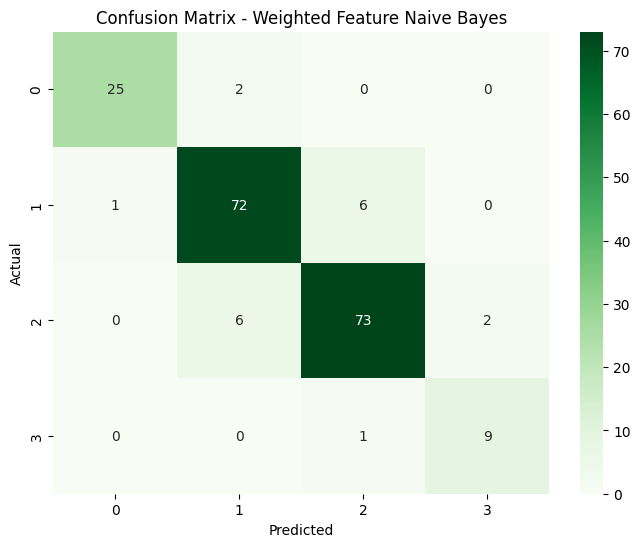

In [19]:
# Confusion Matrix for Weighted Feature NB
cm_wf = confusion_matrix(y_test, y_pred_wf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_wf, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Weighted Feature Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Weighted Pada Fitur Berdasar Information Gain

In [20]:
# Calculate feature weights based on Mutual Information
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X_train, y_train)
feature_weights_mi = mi_scores / mi_scores.max()  # Normalize to max 1
print("Feature weights based on Mutual Information:")
for col, weight in zip(X_train.columns, feature_weights_mi):
    print(f"{col}: {weight:.3f}")

Feature weights based on Mutual Information:
Internet_usg: 1.000
Gender: 0.012
Age_grp: 0.000
Level_study: 0.000
Yr_study: 0.008
Discipline: 0.042
stay_online: 0.168
neglect_chores: 0.131
excitement: 0.151
relationships: 0.054
life_complaint: 0.175
school_work: 0.099
email_socialmedia: 0.069
job_performance: 0.132
defensive_secretive: 0.213
disturbing_thoughts: 0.128
online_anticipation: 0.149
life_no_internet: 0.161
act_annoyed: 0.216
late_night_logins: 0.221
feel_preoccupied: 0.243
online_glued: 0.258
time_cutdown: 0.241
hide_online: 0.197
more_online_time: 0.210
feel_depressed: 0.210
filter_$: 0.050
headache: 0.000
appetite: 0.019
sleep: 0.008
fear: 0.021
shaking: 0.000
nervous: 0.008
digestion: 0.000
troubled: 0.031
unhappy: 0.005
cry: 0.008
enjoyment: 0.000
decisions: 0.017
work: 0.005
play: 0.036
interest: 0.036
worthless: 0.028
suicide: 0.004
tiredness: 0.037
uncomfortable: 0.006
easily_tired: 0.001
SQR_Total: 0.085
New_SQR_total: 0.063
SQR_catg: 0.040


In [21]:
# Display feature details: name, MI score, weight
feature_details_mi = pd.DataFrame({
    'Feature': X_train.columns,
    'MI_Score': mi_scores,
    'Weight': feature_weights_mi
})
print("Feature Details (Mutual Information):")
print(feature_details_mi.sort_values(by='MI_Score', ascending=False))

Feature Details (Mutual Information):
                Feature  MI_Score    Weight
0          Internet_usg  1.154687  1.000000
21         online_glued  0.298139  0.258199
20     feel_preoccupied  0.280499  0.242922
22         time_cutdown  0.278425  0.241126
19    late_night_logins  0.255505  0.221277
18          act_annoyed  0.249688  0.216239
14  defensive_secretive  0.245867  0.212930
24     more_online_time  0.242631  0.210127
25       feel_depressed  0.242375  0.209905
23          hide_online  0.227827  0.197306
10       life_complaint  0.202244  0.175150
6           stay_online  0.194432  0.168385
17     life_no_internet  0.185786  0.160897
8            excitement  0.173917  0.150618
16  online_anticipation  0.171946  0.148911
13      job_performance  0.152888  0.132407
7        neglect_chores  0.151546  0.131244
15  disturbing_thoughts  0.147864  0.128056
11          school_work  0.114239  0.098935
47            SQR_Total  0.098535  0.085335
12    email_socialmedia  0.079162  0.0

In [22]:
# Initialize Weighted Feature Gaussian NB with MI weights
wf_nb_model_mi = WeightedFeatureGaussianNB(feature_weights=feature_weights_mi)

In [23]:
# Train the weighted feature model with MI
wf_nb_model_mi.fit(X_train_scaled, y_train);

In [24]:
# Make predictions with MI weighted feature model
probas_mi = wf_nb_model_mi.predict_proba(X_test_scaled)
y_pred_mi = wf_nb_model_mi.classes_[np.argmax(probas_mi, axis=1)]

In [25]:
# Evaluate the MI weighted feature model
print("Accuracy (MI Weighted Feature NB):", accuracy_score(y_test, y_pred_mi))
print("\nClassification Report (MI Weighted Feature NB):\n", classification_report(y_test, y_pred_mi))

Accuracy (MI Weighted Feature NB): 0.9035532994923858

Classification Report (MI Weighted Feature NB):
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.91      0.94      0.93        79
           2       0.96      0.90      0.93        81
           3       0.59      1.00      0.74        10

    accuracy                           0.90       197
   macro avg       0.84      0.90      0.86       197
weighted avg       0.92      0.90      0.91       197



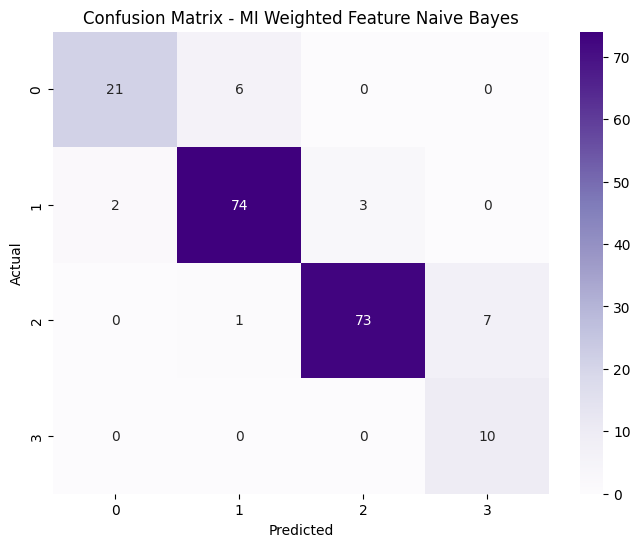

In [26]:
# Confusion Matrix for MI Weighted Feature NB
cm_mi = confusion_matrix(y_test, y_pred_mi)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mi, annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - MI Weighted Feature Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# REPORT

## Exploration

In [27]:
import io
from contextlib import redirect_stdout

# Capture df.info() output
info_buffer = io.StringIO()
with redirect_stdout(info_buffer):
    df.info()
info_str = info_buffer.getvalue()

# Generate distribution plots
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=len(numeric_cols)//4 + 1, ncols=4, figsize=(20, 4*(len(numeric_cols)//4 + 1)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df[col].hist(ax=axes[i], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('../distribution_plots.png')
plt.close()

# Generate correlation heatmap
import seaborn as sns

# Compute correlation matrix
# Fill missing values with mean for correlation calculation
df_filled = df.select_dtypes(include=[np.number]).fillna(df.select_dtypes(include=[np.number]).mean())
corr_matrix = df_filled.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap of Variables')
plt.savefig('../correlation_heatmap.png')
plt.close()

# Variable explanations
explanations = {
    'ID': 'Identifier unik untuk setiap mahasiswa',
    'Internet_usg': 'Internet usage - Penggunaan internet (dalam jam atau frekuensi)',
    'Internet_Add': 'Internet addiction level - Tingkat kecanduan internet (0=normal, 1=ringan, 2=berat)',
    'Gender': 'Jenis kelamin (0=perempuan, 1=laki-laki)',
    'Age_grp': 'Kelompok usia',
    'Level_study': 'Tingkat studi (misal undergraduate)',
    'Yr_study': 'Tahun studi',
    'Discipline': 'Disiplin atau jurusan studi',
    'stay_online': 'How often do you stay online longer than intended? - Seberapa sering Anda tetap online lebih lama dari yang dimaksudkan?',
    'neglect_chores': 'How often do you neglect household chores to spend more time online? - Seberapa sering Anda mengabaikan tugas rumah tangga untuk lebih banyak waktu online?',
    'excitement': 'How often do you feel excited when online? - Seberapa sering Anda merasa excited saat online?',
    'relationships': 'How often do you prefer the excitement of the Internet to intimacy with your partner? - Seberapa sering Anda lebih suka kegembiraan internet daripada keintiman dengan pasangan?',
    'life_complaint': 'How often do you form new relationships with fellow online users? - Seberapa sering Anda membentuk hubungan baru dengan pengguna online lainnya?',
    'school_work': 'How often do you check your e-mail before something else you need to do? - Seberapa sering Anda memeriksa email sebelum melakukan hal lain yang perlu dilakukan?',
    'email_socialmedia': 'How often do your grades or school work suffer because of the amount of time you spend online? - Seberapa sering nilai atau pekerjaan sekolah Anda menderita karena waktu yang dihabiskan online?',
    'job_performance': 'How often do others in your life complain to you about the amount of time you spend online? - Seberapa sering orang lain dalam hidup Anda mengeluh tentang waktu yang Anda habiskan online?',
    'defensive_secretive': 'How often do you feel the need to conceal how much time you spend online? - Seberapa sering Anda merasa perlu menyembunyikan berapa banyak waktu yang Anda habiskan online?',
    'disturbing_thoughts': 'How often do you feel depressed, moody, or nervous when you are offline, which goes away once you are back online? - Seberapa sering Anda merasa depresi, moody, atau gugup saat offline, yang hilang saat kembali online?',
    'online_anticipation': 'How often do you find yourself anticipating when you will go online again? - Seberapa sering Anda menemukan diri Anda mengantisipasi kapan Anda akan online lagi?',
    'life_no_internet': 'How often do you fear that life without the Internet would be boring, empty, and joyless? - Seberapa sering Anda takut bahwa hidup tanpa internet akan membosankan, kosong, dan tanpa kegembiraan?',
    'act_annoyed': 'How often do you snap, yell, or act annoyed if someone bothers you while you are online? - Seberapa sering Anda marah, berteriak, atau bertindak jengkel jika seseorang mengganggu Anda saat online?',
    'late_night_logins': 'How often do you lose sleep due to late-night logins? - Seberapa sering Anda kehilangan tidur karena login malam hari?',
    'feel_preoccupied': 'How often do you feel preoccupied with the Internet when off-line, or fantasize about being online? - Seberapa sering Anda merasa sibuk dengan internet saat offline, atau membayangkan online?',
    'online_glued': 'How often do you try to cut down the amount of time you spend online and fail? - Seberapa sering Anda mencoba mengurangi waktu online dan gagal?',
    'time_cutdown': 'How often do you try to hide how long you\'ve been online? - Seberapa sering Anda mencoba menyembunyikan berapa lama Anda online?',
    'hide_online': 'How often do you choose to spend more time online over going out with others? - Seberapa sering Anda memilih menghabiskan lebih banyak waktu online daripada pergi keluar dengan orang lain?',
    'more_online_time': 'How often do you feel depressed, moody, or nervous when you are offline, which goes away once you are back online? - Seberapa sering Anda merasa depresi, moody, atau gugup saat offline, yang hilang saat kembali online?',
    'feel_depressed': 'How often do you feel depressed when you are offline? - Seberapa sering Anda merasa depresi saat offline?',
    'filter_$': 'How often do you use the Internet to filter out aspects of your life? - Seberapa sering Anda menggunakan internet untuk menyaring aspek kehidupan Anda?',
    'headache': 'Sakit kepala',
    'appetite': 'Masalah nafsu makan',
    'sleep': 'Masalah tidur',
    'fear': 'Rasa takut',
    'shaking': 'Gemetar',
    'nervous': 'Gugup atau tegang',
    'digestion': 'Masalah pencernaan',
    'troubled': 'Merasa terganggu',
    'unhappy': 'Merasa tidak bahagia',
    'cry': 'Mudah menangis',
    'enjoyment': 'Kurangnya kesenangan',
    'decisions': 'Kesulitan membuat keputusan',
    'work': 'Kesulitan bekerja',
    'play': 'Kesulitan bermain atau bersantai',
    'interest': 'Kurang minat',
    'worthless': 'Merasa tidak berharga',
    'suicide': 'Pikiran bunuh diri',
    'tiredness': 'Kelelahan',
    'uncomfortable': 'Merasa tidak nyaman',
    'easily_tired': 'Mudah lelah',
    'SQR_Total': 'Total skor Symptom Checklist Questionnaire (SCL-90 subscale)',
    'New_SQR_total': 'Versi baru dari total skor SQR',
    'SQR_catg': 'Kategori berdasarkan skor SQR (misal normal, mild, severe)'
}

# Format explanations for HTML
formatted_explanations = {k: v.replace(" - ", "<br>") for k, v in explanations.items()}

# Generate HTML content
html_content = f"""
<html>
<head>
    <title>Ringkasan Data IAT</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 20px; }}
        h1, h2 {{ color: #333; }}
        table {{ border-collapse: collapse; width: 100%; margin-bottom: 20px; }}
        th, td {{ border: 1px solid #ddd; padding: 8px; text-align: left; }}
        th {{ background-color: #f2f2f2; }}
        pre {{ background-color: #f9f9f9; padding: 10px; border: 1px solid #ddd; }}
        ul {{ list-style-type: none; padding: 0; }}
        li {{ margin-bottom: 15px; line-height: 1.6; }}
        li strong {{ display: block; margin-bottom: 5px; }}
    </style>
</head>
<body>
    <h1>Ringkasan Data IAT (Internet Addiction Test)</h1>
    
    <h2>Ringkasan Dataset</h2>
    <p><strong>Jumlah Baris:</strong> {df.shape[0]}</p>
    <p><strong>Jumlah Variabel:</strong> {df.shape[1]}</p>
    <p><strong>Jumlah Kolom Numerik:</strong> {len(numeric_cols)}</p>
    <p><strong>Jumlah Kolom Kategorik:</strong> {len(df.select_dtypes(include=['object']).columns)}</p>
    
    <h2>5 Baris Pertama Data</h2>
    {df.head().to_html(index=False)}
    
    <h2>Statistik Deskriptif</h2>
    {df.describe().to_html()}
    
    <h2>Penjelasan Variabel</h2>
    <ul>
    { ''.join(f'<li><strong>{col}:</strong> {formatted_explanations.get(col, "Tidak ada penjelasan")}</li>' for col in df.columns) }
    </ul>
    
    <h2>Missing Values</h2>
    {df.isnull().sum().to_frame(name='Missing Count').to_html()}
    
    <h2>Duplikasi ID</h2>
    <p>Jumlah duplikasi ID: {df['ID'].duplicated().sum()}</p>
    
    <h2>Distribusi Kolom Numerik</h2>
    <p>Kolom numerik: {', '.join(df.select_dtypes(include=['int64', 'float64']).columns.tolist())}</p>
    <img src="distribution_plots.png" alt="Distribusi Variabel Numerik" style="max-width:100%;">
    
    <h2>Correlation Heatmap</h2>
    <img src="correlation_heatmap.png" alt="Correlation Heatmap" style="max-width:100%;">
</body>
</html>
"""

# Save to HTML file
with open('../data_summary.html', 'w', encoding='utf-8') as f:
    f.write(html_content)

print("Ringkasan data telah disimpan ke '../data_summary.html'")

Ringkasan data telah disimpan ke '../data_summary.html'


## Modelling

In [29]:
# Generate Modelling Report in HTML
import io
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from contextlib import redirect_stdout

# Function to generate base64 encoded image from confusion matrix
def get_confusion_matrix_image(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    plt.close()
    return f"data:image/png;base64,{image_base64}"

# Compute confusion matrices
cm_corr = confusion_matrix(y_test, y_pred_wf)
cm_mi = confusion_matrix(y_test, y_pred_mi)

# Get images
img_corr = get_confusion_matrix_image(cm_corr, 'Confusion Matrix - Correlation-based Weighted NB')
img_mi = get_confusion_matrix_image(cm_mi, 'Confusion Matrix - MI-based Weighted NB')

# Capture results for Correlation-based Weighted NB
corr_accuracy = accuracy_score(y_test, y_pred_wf)
corr_report_buffer = io.StringIO()
with redirect_stdout(corr_report_buffer):
    print(classification_report(y_test, y_pred_wf))
corr_report_str = corr_report_buffer.getvalue()

# Capture results for MI-based Weighted NB
mi_accuracy = accuracy_score(y_test, y_pred_mi)
mi_report_buffer = io.StringIO()
with redirect_stdout(mi_report_buffer):
    print(classification_report(y_test, y_pred_mi))
mi_report_str = mi_report_buffer.getvalue()

# Generate HTML for Modelling Results
modelling_html = f"""
<html>
<head>
    <title>Modelling Results - Internet Addiction Classification</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 20px; }}
        h1, h2, h3 {{ color: #333; }}
        table {{ border-collapse: collapse; width: 100%; margin-bottom: 20px; }}
        th, td {{ border: 1px solid #ddd; padding: 8px; text-align: left; }}
        th {{ background-color: #f2f2f2; }}
        pre {{ background-color: #f9f9f9; padding: 10px; border: 1px solid #ddd; white-space: pre-wrap; }}
        .section {{ margin-bottom: 40px; }}
        img {{ max-width: 100%; height: auto; }}
    </style>
</head>
<body>
    <h1>Modelling Results - Internet Addiction Classification</h1>
    
    <div class="section">
        <h2>Model yang Digunakan</h2>
        <p><strong>Weighted Feature Gaussian Naive Bayes</strong></p>
        <p>Model ini adalah variasi dari Gaussian Naive Bayes yang menerapkan bobot pada setiap fitur berdasarkan pentingnya fitur tersebut terhadap target variable. Bobot dihitung menggunakan dua pendekatan:</p>
        <ul>
            <li><strong>Pembobotan Berdasarkan Korelasi:</strong> Bobot fitur dihitung dari nilai absolut korelasi antara fitur dan target variable, dinormalisasi ke maksimum 1.</li>
            <li><strong>Pembobotan Berdasarkan Information Gain (Mutual Information):</strong> Bobot fitur dihitung dari skor mutual information antara fitur dan target variable, dinormalisasi ke maksimum 1.</li>
        </ul>
    </div>
    
    <div class="section">
        <h2>Hasil Pemodelan - Pendekatan Korelasi</h2>
        <h3>Akurasi</h3>
        <p><strong>Accuracy:</strong> {corr_accuracy:.4f}</p>
        <h3>Classification Report</h3>
        <pre>{corr_report_str}</pre>
        <h3>Confusion Matrix</h3>
        <img src="{img_corr}" alt="Confusion Matrix - Correlation-based">
    </div>
    
    <div class="section">
        <h2>Hasil Pemodelan - Pendekatan Information Gain</h2>
        <h3>Akurasi</h3>
        <p><strong>Accuracy:</strong> {mi_accuracy:.4f}</p>
        <h3>Classification Report</h3>
        <pre>{mi_report_str}</pre>
        <h3>Confusion Matrix</h3>
        <img src="{img_mi}" alt="Confusion Matrix - MI-based">
    </div>
    
    <div class="section">
        <h2>Perbandingan Pendekatan</h2>
        <table>
            <tr>
                <th>Pendekatan</th>
                <th>Akurasi</th>
            </tr>
            <tr>
                <td>Korelasi</td>
                <td>{corr_accuracy:.4f}</td>
            </tr>
            <tr>
                <td>Information Gain</td>
                <td>{mi_accuracy:.4f}</td>
            </tr>
        </table>
    </div>
</body>
</html>
"""

# Save to HTML file
with open('../modelling_results.html', 'w', encoding='utf-8') as f:
    f.write(modelling_html)

print("Laporan pemodelan telah disimpan ke '../modelling_results.html'")

Laporan pemodelan telah disimpan ke '../modelling_results.html'
